In [67]:
# Import required packages here (after they are installed)
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

# Load data. csv file should be in the same folder as the notebo ok for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [68]:
#shuffle the data and select training and test data
np.random.seed(100) 
np.random.shuffle(data)

features = [] 
digits = []

for row in data:
#import the data and select only the 1's and 5's 
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) 
        digits.append(str(row[0]))

#Select the proportion of data to use for training. #Notice that we have set aside 80% of the data for testing 
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain] 
testFeatures = features[numTrain:] 
trainDigits = digits[:numTrain] 
testDigits = digits[numTrain:]

In [69]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []
colors = []

for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")


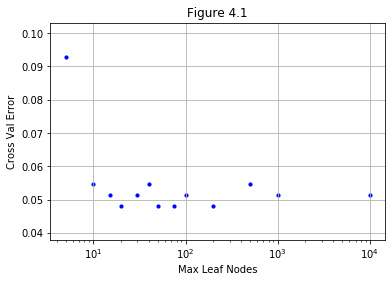

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

maxLeafNodes = [5,10,15,20,30,40,50,75,100,200,500,1000,10000]
errors = []

for i in maxLeafNodes:
    model = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i)
    errors.append( np.average( 1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))

#plot the points
mp.scatter(maxLeafNodes,errors,s=10,c="b")

#specify the axes
mp.xlabel("Max Leaf Nodes")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.1")

#display the current graph
show()


There was evidence of underfitting for the value of 5 for max leaf nodes as it has significantly error. This is likely because this is too few nodes to make the model complex enough to fit the data well.

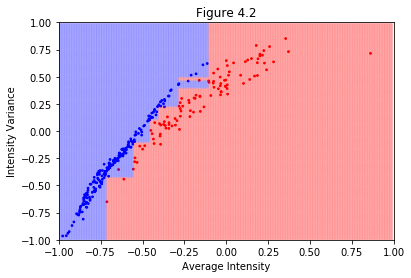

In [71]:
model = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = maxLeafNodes[ np.argmin( errors)])

model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 4.2")

show()



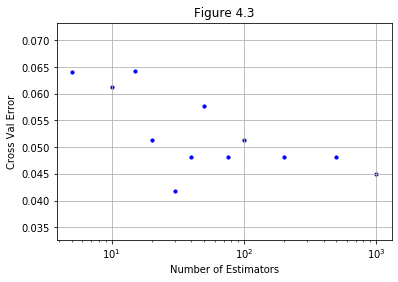

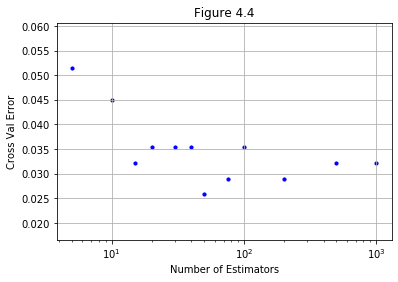

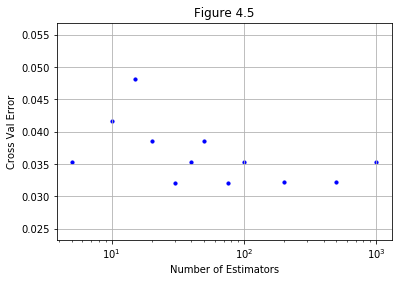

In [73]:
from sklearn.ensemble import RandomForestClassifier

maxLeafNodes = [10, 100, 1000]
numEstimators = [5,10,15,20,30,40,50,75,100,200,500,1000]#,10000]

errors = [ [], [], [] ]

i = 0
for nNodes in maxLeafNodes:
    for nEstimators in numEstimators:
        model = RandomForestClassifier( n_estimators = nEstimators, max_leaf_nodes = nNodes, n_jobs = -1)
        errors[i].append( np.average( 1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    i+=1
    
    
#plot the points
mp.scatter(numEstimators,errors[0],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.3")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[1],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.4")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[2],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.5")

#display the current graph
show()

The value of 100 for max leaf nodes was most impacted. Unlike the other models, the accuracy for max_leaf_nodes=100 consistently decreases then steadies as n_estimators is increased.
I believe this is the case because having only 10 leaf nodes likely causes the model to underfit the data whereas having 1000 leaf nodes causes the model to overfit the data. 100 leaf nodes likely is a nice fit for the data.

For the model where max_leaf_nodes=100, n_estimators impacted the result quite significantly, bringing error down from 0.45 to under 0.35. Increasing estimators no longer made an impact after having about 40 estimators.

In [87]:
RandomForestClassifier( n_estimators = 50, max_leaf_nodes = 100, n_jobs = -1)

model.fit( simpleTrain, trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
    print(xP, end='|')
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 4.6")

show()

*FIGURE 4.6*
I let my machine run this code for a little under an hour and it did not complete so I added print statements to see how fast each coordinate is calculated. After recording the time and making some calculations, it seems as if figure 4.6 would take my machine about 2 and a half hours to finish executing, which is why I am not able to produce the figure. Above is the code, though.

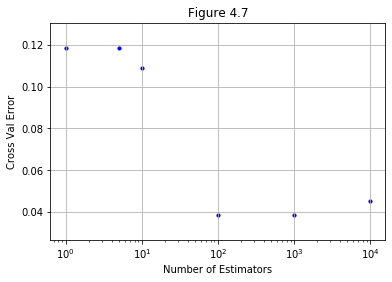

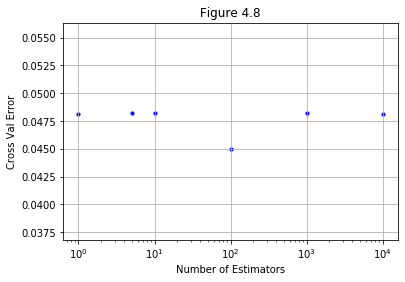

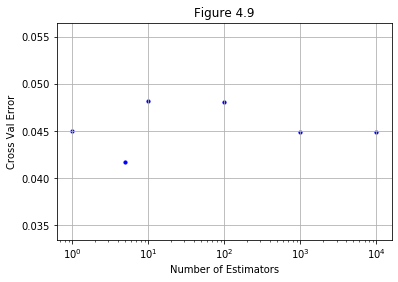

In [91]:
from sklearn.ensemble import AdaBoostClassifier

numEstimators = [1,5,10,100,1000,10000]
errors = []

for i in numEstimators:
    model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 1), n_estimators = i)
    errors.append( np.average( 1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))

#plot the points
mp.scatter(numEstimators,errors,s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.7")

#display the current graph
show()


errors = []

for i in numEstimators:
    model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 10), n_estimators = i)
    errors.append( np.average( 1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))

#plot the points
mp.scatter(numEstimators,errors,s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.8")

#display the current graph
show()



errors = []

for i in numEstimators:
    model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 1000), n_estimators = i)
    errors.append( np.average( 1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))

#plot the points
mp.scatter(numEstimators,errors,s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 4.9")

#display the current graph
show()




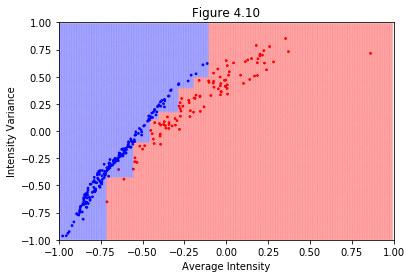

In [15]:
model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 1000), n_estimators = 5)

model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 4.10")

show()

In [17]:
simpleTest = []

for index in range(len(testFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(testFeatures[index])+.75 
    yNew = 3*np.var(testFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTest.append([xNew,yNew])

In [28]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

polySVM = SVC( C = 4, kernel = "poly", degree = 3)

neuralNetwork = MLPClassifier(learning_rate_init=0.01, hidden_layer_sizes=([50]*10), activation='relu', epsilon=0.001, max_iter=10000, alpha=0, solver="adam")

randomForest = RandomForestClassifier( n_estimators = 4, max_leaf_nodes = 100)

adaBoost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 10), n_estimators = 100)


polySVM.fit( simpleTrain, trainDigits)
neuralNetwork.fit( simpleTrain, trainDigits)
randomForest.fit( simpleTrain, trainDigits)
adaBoost.fit( simpleTrain, trainDigits)

print( polySVM.score( simpleTest, testDigits))
print( neuralNetwork.score( simpleTest, testDigits))
print( randomForest.score( simpleTest, testDigits))
print( adaBoost.score( simpleTest, testDigits))

0.9903923138510808
0.9511609287429944
0.9455564451561249
0.967173738991193


Polynomial SVM error = 1 - 0.9903923138510808 = 0.00960768614
Neural Network error = 1 - 0.9511609287429944 = 0.04883907125
Random Forest error = 1 - 0.9455564451561249 = 0.05444355484
AdaBoost error = 1 - 0.967173738991193 = 0.032826261

Markov:

    If the confidence interval is 99%, then delta = 1-0.99 = 0.01.
    This means that E(X)/a = 0.01 which means a must equal 1/0.01*E(X) = 100*E(X)
        Polynomial SVM error upper bound at 99% = 100 * 0.00960768614 = 0.960768614
        Neural Network error upper bound at 99% = 100 * 0.04883907125 = 4.883907125
        Random Forest error upper bound at 99% = 100 * 0.05444355484 = 5.444355484
        AdaBoost error upper bound at 99% = 100 * 0.032826261 = 3.2826261
        
    If the confidence interval is 95%, then delta = 1-0.95 = 0.05.
    This means that E(X)/a = 0.05 which means a must equal 1/0.05*E(X) = 20*E(X)
        Polynomial SVM error upper bound at 95% = 20 * 0.00960768614 = 0.1921537228
        Neural Network error upper bound at 95% = 20 * 0.04883907125 = 0.976781425
        Random Forest error upper bound at 95% = 20 * 0.05444355484 = 1.0888710968
        AdaBoost error upper bound at 95% = 20 * 0.032826261 = 0.65652522
        
    If the confidence interval is 75%, then delta = 1-0.75 = 0.25.
    This means that E(X)/a = 0.05 which means a must equal 1/0.25*E(X) = 4*E(X)
        Polynomial SVM error upper bound at 75% = 4 * 0.00960768614 = 0.03843074456
        Neural Network error upper bound at 75% = 4 * 0.04883907125 = 0.195356285
        Random Forest error upper bound at 75% = 4 * 0.05444355484 = 0.21777421936
        AdaBoost error upper bound at 75% = 4 * 0.032826261 = 0.131305044
    

In [61]:
models = ["Polynomial SVM", "Neural Network", "Random Forest", "AdaBoost"]
scores = [0.9903923138510808, 0.9511609287429944, 0.9455564451561249, 0.967173738991193]
confidences = [0.99, 0.95, 0.75]

print("Chebyshev:")

for confidence in confidences:
    print("\tConfidence Interval: ", confidence)
    for i in range( len ( models)):
        print("\t\t", models[ i], "error upper bound at", confidence, "=", ( 1 - scores[ i] + 0.25 / ( len( testDigits) * ( 1 - confidence) * ( 1 - confidence))))

Chebyshev:
	Confidence Interval:  0.99
		 Polynomial SVM error upper bound at 0.99 = 2.0112089671737357
		 Neural Network error upper bound at 0.99 = 2.050440352281822
		 Random Forest error upper bound at 0.99 = 2.0560448358686916
		 AdaBoost error upper bound at 0.99 = 2.0344275420336233
	Confidence Interval:  0.95
		 Polynomial SVM error upper bound at 0.95 = 0.08967173738991181
		 Neural Network error upper bound at 0.95 = 0.12890312249799823
		 Random Forest error upper bound at 0.95 = 0.13450760608486773
		 AdaBoost error upper bound at 0.95 = 0.11289031224979969
	Confidence Interval:  0.75
		 Polynomial SVM error upper bound at 0.75 = 0.01281024819855887
		 Neural Network error upper bound at 0.75 = 0.05204163330664531
		 Random Forest error upper bound at 0.75 = 0.0576461168935148
		 AdaBoost error upper bound at 0.75 = 0.03602882305844675


In [66]:
models = ["Polynomial SVM", "Neural Network", "Random Forest", "AdaBoost"]
scores = [0.9903923138510808, 0.9511609287429944, 0.9455564451561249, 0.967173738991193]
confidences = [0.99, 0.95, 0.75]

print("Hoeffding:")

for confidence in confidences:
    print("\tConfidence Interval: ", confidence)
    for i in range( len ( models)):
        value = (1 / (2 * len( testDigits)) * np.log( 2 / ( 1 - confidence)))
        value = value**0.5
        print("\t\t", models[ i], "error upper bound at", confidence, "=", value)

Hoeffding:
	Confidence Interval:  0.99
		 Polynomial SVM error upper bound at 0.99 = 0.04605457377537783
		 Neural Network error upper bound at 0.99 = 0.04605457377537783
		 Random Forest error upper bound at 0.99 = 0.04605457377537783
		 AdaBoost error upper bound at 0.99 = 0.04605457377537783
	Confidence Interval:  0.95
		 Polynomial SVM error upper bound at 0.95 = 0.03842828604270711
		 Neural Network error upper bound at 0.95 = 0.03842828604270711
		 Random Forest error upper bound at 0.95 = 0.03842828604270711
		 AdaBoost error upper bound at 0.95 = 0.03842828604270711
	Confidence Interval:  0.75
		 Polynomial SVM error upper bound at 0.75 = 0.02885208087345724
		 Neural Network error upper bound at 0.75 = 0.02885208087345724
		 Random Forest error upper bound at 0.75 = 0.02885208087345724
		 AdaBoost error upper bound at 0.75 = 0.02885208087345724


a) The model that changed most dramatically with respect to confidence interval was the Random Forest Classifier

b) I would choose the polynomial support vector machine because along with scoring the highest on the testing data, it also (resultingly) had the least errors with the different error bounds.

c) Some other considerations could be since the data is quite easily separable, we do not need as complex models and a SVM would fit the data well. 